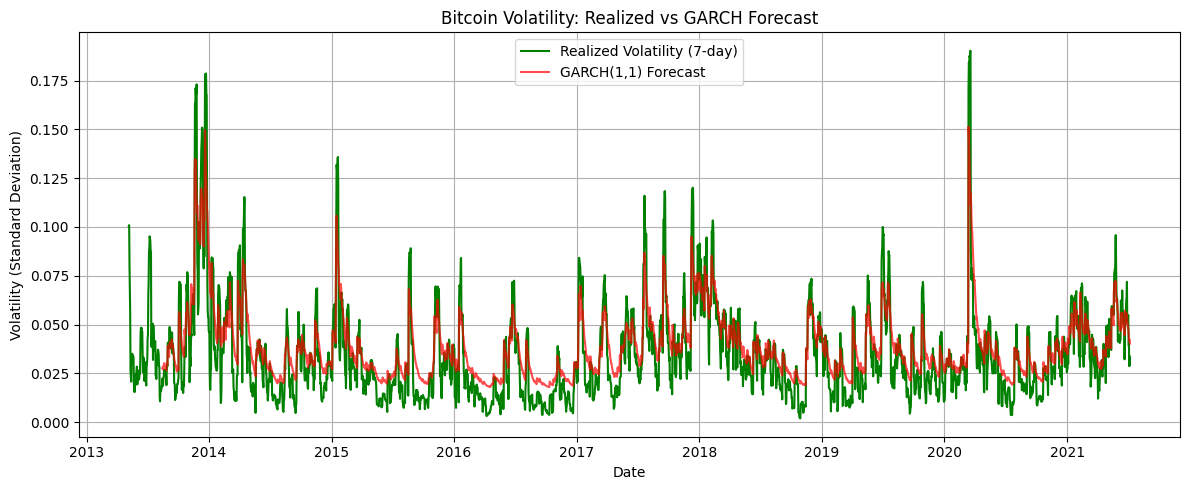

In [1]:
# GARCH_Bitcoin.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
# Load processed Bitcoin data
df = pd.read_csv('../outputs/processed_Bitcoin.csv', parse_dates=['Date'], index_col='Date')
returns = df['Log_Return'].dropna()
# Fit GARCH(1,1) model
model = arch_model(returns, vol='GARCH', p=1, q=1, rescale=False)
res = model.fit(update_freq=10, disp='off')
res.summary()
# Dynamic forecast (in-sample)
start = 100  # skip initial unstable values
garch_forecast = res.forecast(start=start).variance
garch_vol = garch_forecast ** 0.5

# Align with DataFrame
df['GARCH_Forecast'] = garch_vol.reindex(df.index)
# Plot realized vs GARCH forecasted volatility
plt.figure(figsize=(12, 5))
plt.plot(df['Volatility_7d'], label='Realized Volatility (7-day)', color='green')
plt.plot(df['GARCH_Forecast'], label='GARCH(1,1) Forecast', color='red', alpha=0.7)
plt.title('Bitcoin Volatility: Realized vs GARCH Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# GARCH Model for Bitcoin Volatility Forecasting